In [1]:
from matplotlib import pyplot as plt
import numpy as np

Definition of constants

- `Nl` The total number of odorants

- `Nr` The number of receptors

- `K` The average number of odorants in the mixture

- `s` The probability that an odorant binds to a receptor


In [2]:
class BinaryEliminationSystem:

    ss_mat = None # Sparse Sensing Matrix
    ss_mat_index = None
    nl:int = 0 # total number of odorants
    nr:int = 0 # number of receptors
    k:int = 0 # average number of odorants in mixture
    s:float = 0 # probability that an odorant binds to a receptor
    odor_mat = None # generated odor inputs matrix (column major)
    rr = None; # receptor response matrix (column major)
    pred_odor_mat = None # predicted odor inputs (column major)


    def __init__(self, nl, nr, k, s):
        self.nl = nl
        self.nr = nr
        self.k = k
        self.s = s
        self.generate_ss_mat()


    def generate_ss_mat(self):
        """
        Generate a new sparce sensing matrix
        Args: 
        
        Returns:
            out (None): None
        """
        self.ss_mat = np.zeros((self.nr, self.nl), dtype=np.uint8)
        self.ss_mat_index = [[] for i in range(self.nr)]
        value = np.random.random((self.nr, self.nl)) < self.s
        for i in range(self.nr):
            for j in range(self.nl):
                if value[i, j]:
                    self.ss_mat[i, j] = 1;
                    self.ss_mat_index[i].append(j)
    

    def __generate_rand_odor(self, count):
        """
        Generate some odor vectors. Dimension of self.odor_mat will be (nl by count)
        Args: 
            count: Number of odor vectors to generate
        Returns:
            out (None): none
        """
        self.odor_mat = np.zeros((self.nl, count))
        for j in range(count):
            chosen = np.random.choice(self.nl, size=self.k, replace=False)
            for i in range(chosen.size):
                self.odor_mat[chosen[i], j] = 1
        
    
    def __get_rr(self):
        """
        Calculate the receptor response
        Args: 
            
        Returns:
            out (None): none
        """
        self.rr = np.dot(self.ss_mat, self.odor_mat)


    def encode_decode(self, count):
        """
        Calculate the receptor response
        Args: 
            
        Returns:
            out (None): none
        """
        self.__generate_rand_odor(count)
        self.__get_rr()
        self.pred_odor_mat = np.ones((self.nl, count), dtype=np.uint8)
        inactive = np.where(self.rr == 0)
        inactive = np.array(inactive)
        for i in range(count):
            inact = np.where(inactive[1,:] == i)
            zero_out = np.any(self.ss_mat[inactive[0,inact]][0] == 1, axis=0)
            self.pred_odor_mat[zero_out, i] = 0


    def show_result(self):
        count = 0
        for i in range(self.odor_mat.shape[1]):
            if (np.array_equal(self.odor_mat.T[i, :], self.pred_odor_mat.T[i, :])):
                count += 1
        return count

100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590


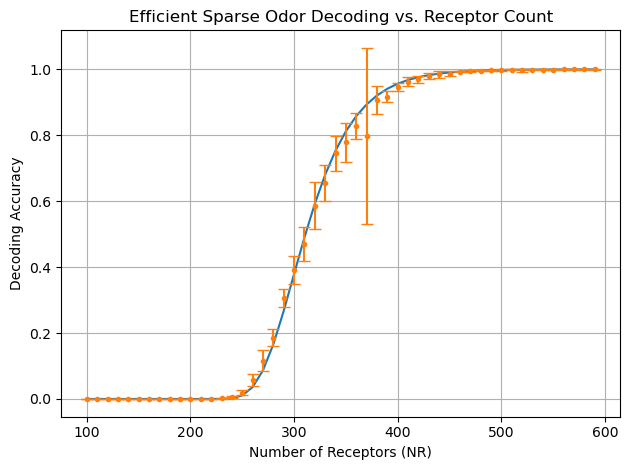

In [5]:
probs = []
mean_probs = []
errs = []
nr_values = np.arange(100, 600, 10)
for nr in nr_values:
    print(nr)
    trial_accuracies = np.zeros(10)
    a = BinaryEliminationSystem(10000, nr, 10, 0.05)
    for i in range(10):
        a.generate_ss_mat()
        a.encode_decode(500)
        correct = a.show_result()
        trial_accuracies[i] = correct / 500
    mean_probs.append(np.mean(trial_accuracies))
    errs.append(np.std(trial_accuracies))

# Plot
def estpc(Nr,k,s, NL):
    alpha = k/NL
    return (alpha+(1-alpha)*(1-(1-s*(1-s*alpha)**(NL-1))**Nr))**NL

plt.plot(nr_values,estpc(nr_values,10,0.05, 10000))
plt.errorbar(nr_values, mean_probs, yerr=errs, fmt='o', markersize=3, capsize=4)
plt.xlabel("Number of Receptors (NR)")
plt.ylabel("Decoding Accuracy")
plt.title("Efficient Sparse Odor Decoding vs. Receptor Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
def phalf(s):
    return -(-4.61486830584+np.log(1/s))/s

NR = 1000
NL = 100000
k_vals = np.arange(1,50,1)
s_vals = np.linspace(0.01,0.1,49)
probs=np.zeros((49,49))
sNRs = []
ESTs = []

for i in range(len(s_vals)):
    sNRs.append(s_vals[i]*NR)
    ESTs.append(phalf(s_vals[i]))
    print(f"Working on {i+1}/{len(s_vals)}")
    for j in range(len(k_vals)):
        print(f"\tWorking on {j+1}/{len(k_vals)}")
        a = BinaryEliminationSystem(NL, NR, k_vals[j], s_vals[i])
        a.encode_decode(10)
        correct = a.show_result()
        probs[j][i] = correct / 10
        
plt.plot(sNRs, ESTs,color='w')
plt.contourf(sNRs, k_vals, probs, levels=50, cmap='viridis')
plt.colorbar(label='P(c=c)')
plt.xlabel('s*NR')
plt.ylabel('K')
plt.savefig("binary2")
plt.show()

Working on 1/49
	Working on 1/49
	Working on 2/49
	Working on 3/49
	Working on 4/49
	Working on 5/49
	Working on 6/49
	Working on 7/49
	Working on 8/49
	Working on 9/49
	Working on 10/49
	Working on 11/49
	Working on 12/49
	Working on 13/49
	Working on 14/49
	Working on 15/49
	Working on 16/49
	Working on 17/49
	Working on 18/49
	Working on 19/49
	Working on 20/49
	Working on 21/49
	Working on 22/49
	Working on 23/49
	Working on 24/49
	Working on 25/49
	Working on 26/49
	Working on 27/49
	Working on 28/49
	Working on 29/49
	Working on 30/49
	Working on 31/49
	Working on 32/49
	Working on 33/49
	Working on 34/49
	Working on 35/49
	Working on 36/49
	Working on 37/49
	Working on 38/49
	Working on 39/49
	Working on 40/49
	Working on 41/49
	Working on 42/49
	Working on 43/49
	Working on 44/49
	Working on 45/49
	Working on 46/49
	Working on 47/49
	Working on 48/49
	Working on 49/49
Working on 2/49
	Working on 1/49
	Working on 2/49
	Working on 3/49
	Working on 4/49
	Working on 5/49
	Working o

KeyboardInterrupt: 

Generate values for matrix **S** (receptor sensitivity to odorants)

- Dimension for `S` is `Nr` by `Nl`.

- Probability of an entry to be non-zero is `s`

- The non-zero entries are log-uniformly distributed between $10^{-1}$ and $10^1$